In [1]:
# Import packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from joblib import dump, load
from sklearn.metrics import r2_score
import shap
from sklearn.inspection import PartialDependenceDisplay

C:\Users\Holger\micromamba\envs\agile2024\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sns.set_theme()

# Prepare RF training and test sets

In [3]:
# Read ML input
ml_input = pd.read_csv("agile2024_tn_ml_input.csv", sep=",")
display(ml_input)

,obs_id,site_code,obs_year,obs_value,arable_prop,area,clay1_mean,forest_prop,grassland_prop,k1_mean,...,rock1_mean,sand1_mean,silt1_mean,slope_mean,soc1_mean,temp_mean,twi_mean,urban_prop,water_prop,wetland_prop
0,1,SJA0088000,2016,1.138,0.122,704297025.0,21.031,0.706,0.035,59.083,...,4.072,65.292,13.677,0.875,8.971,6.524,9.851,0.012,0.004,0.084
1,2,SJA0088000,2017,1.175,0.122,704297025.0,21.031,0.706,0.035,59.083,...,4.072,65.292,13.677,0.875,8.971,6.495,9.851,0.012,0.004,0.084
2,3,SJA0106000,2016,5.967,0.428,26553800.0,25.857,0.491,0.025,16.544,...,5.801,55.326,18.817,0.813,8.528,6.231,10.252,0.018,0.000,0.021
3,4,SJA0106000,2017,4.175,0.428,26553800.0,25.857,0.491,0.025,16.544,...,5.801,55.326,18.817,0.813,8.528,6.133,10.252,0.018,0.000,0.021
4,5,SJA0106000,2018,4.225,0.428,26553800.0,25.857,0.491,0.025,16.544,...,5.801,55.326,18.817,0.813,8.528,7.025,10.252,0.018,0.000,0.021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,461,SJB3502000,2019,5.347,0.579,18557575.0,25.775,0.322,0.032,40.267,...,8.719,57.976,16.249,0.924,8.993,6.842,10.334,0.023,0.003,0.025
461,462,SJB3502000,2020,5.596,0.579,18557575.0,25.775,0.322,0.032,40.267,...,8.719,57.976,16.249,0.924,8.993,7.783,10.334,0.023,0.003,0.025
462,463,SJB3503000,2020,8.225,0.537,112294125.0,22.755,0.304,0.083,14.110,...,9.007,55.590,21.654,1.292,7.390,7.684,10.033,0.028,0.002,0.014
463,464,SJB3510000,2019,8.090,0.475,29300575.0,21.450,0.303,0.082,24.142,...,8.858,59.238,19.312,1.822,8.315,6.743,9.690,0.025,0.004,0.096


In [4]:
ml_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   obs_id             465 non-null    int64  
 1   site_code          465 non-null    object 
 2   obs_year           465 non-null    int64  
 3   obs_value          465 non-null    float64
 4   arable_prop        465 non-null    float64
 5   area               465 non-null    float64
 6   clay1_mean         465 non-null    float64
 7   forest_prop        465 non-null    float64
 8   grassland_prop     465 non-null    float64
 9   k1_mean            465 non-null    float64
 10  limestone_prop     465 non-null    float64
 11  livestock_density  465 non-null    float64
 12  other_prop         465 non-null    float64
 13  precip_mean        465 non-null    float64
 14  rock1_mean         465 non-null    float64
 15  sand1_mean         465 non-null    float64
 16  silt1_mean         465 non

In [5]:
ml_input[ml_input["temp_mean"].isna()]

,obs_id,site_code,obs_year,obs_value,arable_prop,area,clay1_mean,forest_prop,grassland_prop,k1_mean,...,rock1_mean,sand1_mean,silt1_mean,slope_mean,soc1_mean,temp_mean,twi_mean,urban_prop,water_prop,wetland_prop


C:\Users\Holger\AppData\Local\Temp\ipykernel_26608\814460452.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ml_input.iloc[:, 4:].hist(ax=ax)


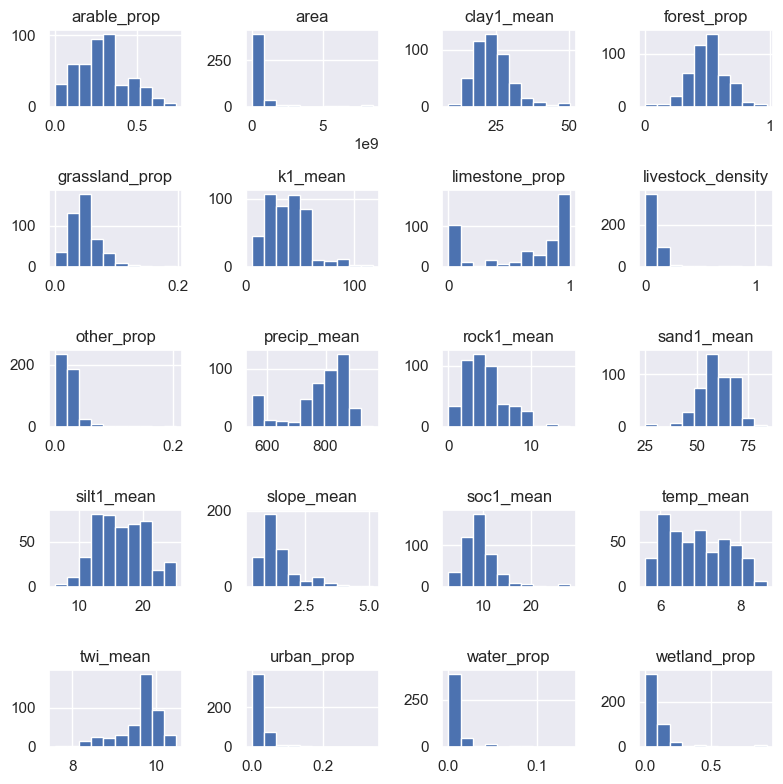

In [6]:
# Plot histograms of features
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ml_input.iloc[:, 4:].hist(ax=ax)
fig.tight_layout()

In [7]:
# Extract features and target
X = ml_input.iloc[:, 4:]
y = ml_input["obs_value"]

In [8]:
# Split the data into training and test sets
test_size = 0.3
random_state = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Train model

In [9]:
# RF regressor
regressor = RandomForestRegressor()

In [10]:
# Fit model
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
# Calculate accuracy on training set
regressor.score(X_train, y_train)

0.9651254823388249

In [12]:
# Predict
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)

In [13]:
# Calculate accuracy on test set
r2_score(y_test, Y_test_pred)

0.8161693524267137

# Calculate SHAP values

In [14]:
# Calculate SHAP values
explainer = shap.TreeExplainer(regressor)
shap_values = shap.TreeExplainer(regressor).shap_values(X_train)

In [15]:
shap_values

array([[-1.87936637e-01,  1.29329000e-02,  5.67383594e-03, ...,
         1.69388070e-02, -5.60113301e-02, -4.20418756e-02],
       [ 3.36117405e+00,  2.24314402e-02,  3.38043659e-02, ...,
        -1.38160049e-02,  1.65786135e-01,  3.36940278e-02],
       [ 3.16381793e+00,  1.11023760e-01, -9.74730571e-03, ...,
         1.52398176e-02,  7.69420234e-02, -3.53525048e-03],
       ...,
       [-1.99232424e-01, -5.83835035e-02, -1.87006424e-02, ...,
        -5.93292811e-03, -6.20933069e-02, -6.93555142e-02],
       [ 1.25684920e-01,  3.72945443e-02, -8.62225557e-03, ...,
        -2.12478702e-03,  2.03506616e-04, -2.46432352e-04],
       [-1.13589564e+00, -1.06253013e-02,  4.27498393e-02, ...,
         5.56317974e-02, -2.57215756e-02, -8.12609105e-03]])

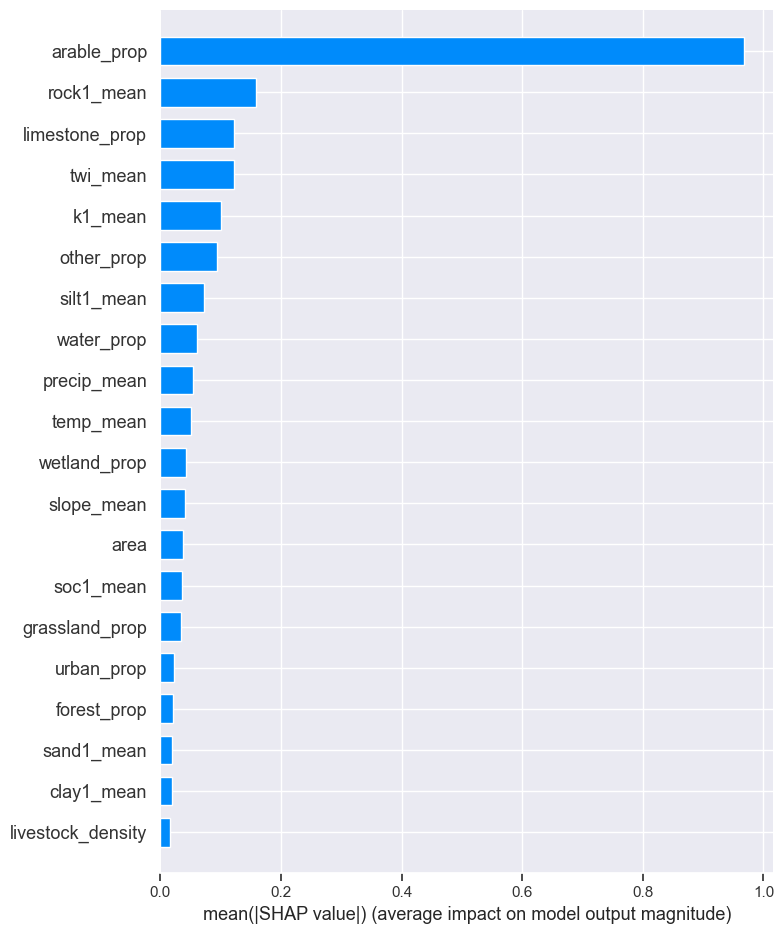

<Figure size 640x480 with 0 Axes>

In [16]:
# SHAP summary bar plot
shap.summary_plot(shap_values=shap_values, features=X_train, feature_names=X_train.columns, plot_type="bar")
plt.tight_layout()

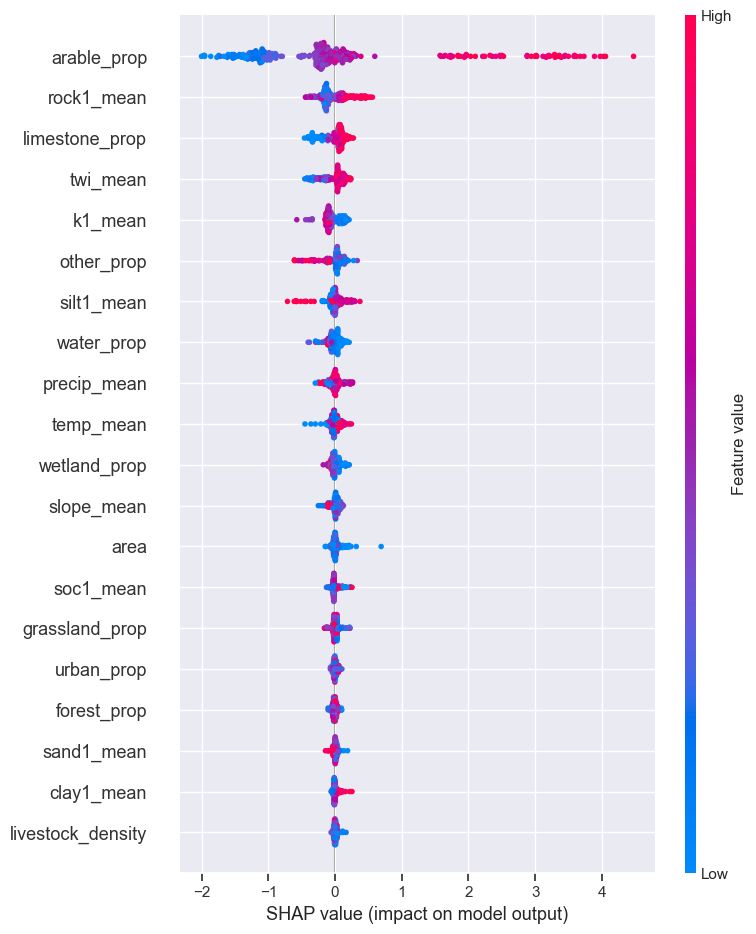

<Figure size 640x480 with 0 Axes>

In [17]:
# SHAP summary beeswarm plot
shap.summary_plot(shap_values=shap_values, features=X_train, feature_names=X_train.columns)
plt.tight_layout()

# Reduce number of features based on SHAP values

In [18]:
# Create DataFrame of absolute mean SHAP values
abs_mean_shap_df = pd.DataFrame(
    list(zip(X_test.columns, np.abs(shap_values).mean(0))), columns=["feature", "abs_mean_shap"]
)

In [19]:
# Sort based on absolute mean SHAP values
abs_mean_shap_df = abs_mean_shap_df.sort_values(by=["abs_mean_shap"], ascending=False).reset_index(drop=True)

In [20]:
abs_mean_shap_df

,feature,abs_mean_shap
0,arable_prop,0.967697
1,rock1_mean,0.158936
2,limestone_prop,0.122675
3,twi_mean,0.122484
4,k1_mean,0.100227
5,other_prop,0.093491
6,silt1_mean,0.072878
7,water_prop,0.060134
8,precip_mean,0.053660
9,temp_mean,0.050693


In [21]:
# List of most important features
n_features = 15
top_features = abs_mean_shap_df["feature"].head(n_features).to_list()
print(top_features)

['arable_prop', 'rock1_mean', 'limestone_prop', 'twi_mean', 'k1_mean', 'other_prop', 'silt1_mean', 'water_prop', 'precip_mean', 'temp_mean', 'wetland_prop', 'slope_mean', 'area', 'soc1_mean', 'grassland_prop']


In [22]:
# Generate new training and test feature sets
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

# Train model on reduced data

In [23]:
# RF regressor
regressor_reduced = RandomForestRegressor()

# Fit model
regressor_reduced.fit(X_train_reduced, y_train)

RandomForestRegressor()

In [24]:
# Calculate accuracy on training set
regressor_reduced.score(X_train_reduced, y_train)

0.9664944531773169

In [25]:
# Predict
Y_train_pred_reduced = regressor_reduced.predict(X_train_reduced)
Y_test_pred_reduced = regressor_reduced.predict(X_test_reduced)

In [26]:
# Calculate accuracy on test set
r2_score(y_test, Y_test_pred_reduced)

0.7989720799871605

# SHAP analysis of the new model

In [27]:
# Calculate SHAP values
explainer_reduced = shap.TreeExplainer(regressor_reduced)
shap_values_reduced = shap.TreeExplainer(regressor_reduced).shap_values(X_train_reduced)

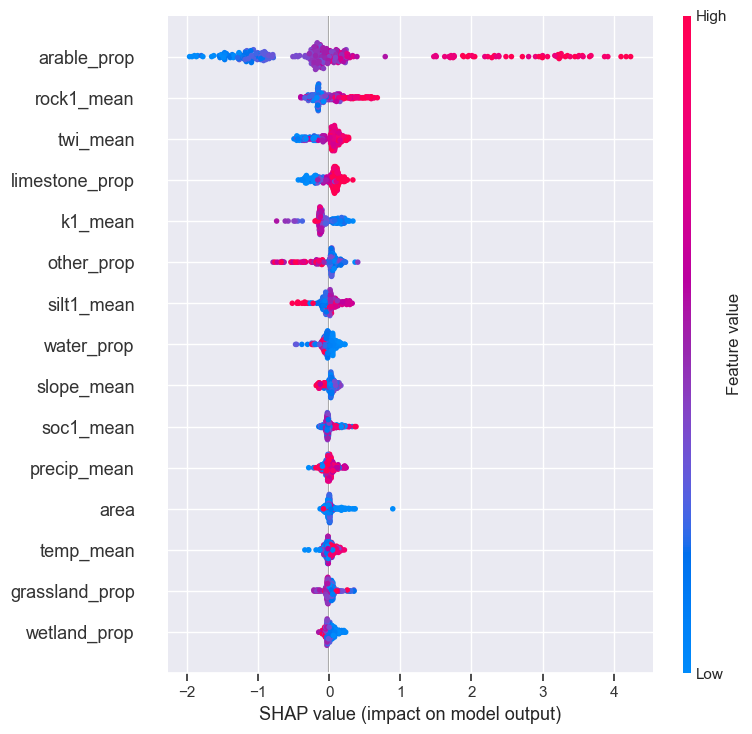

<Figure size 640x480 with 0 Axes>

In [28]:
# SHAP summary beeswarm plot
shap.summary_plot(shap_values=shap_values_reduced, features=X_train_reduced, feature_names=X_train_reduced.columns)
plt.tight_layout()

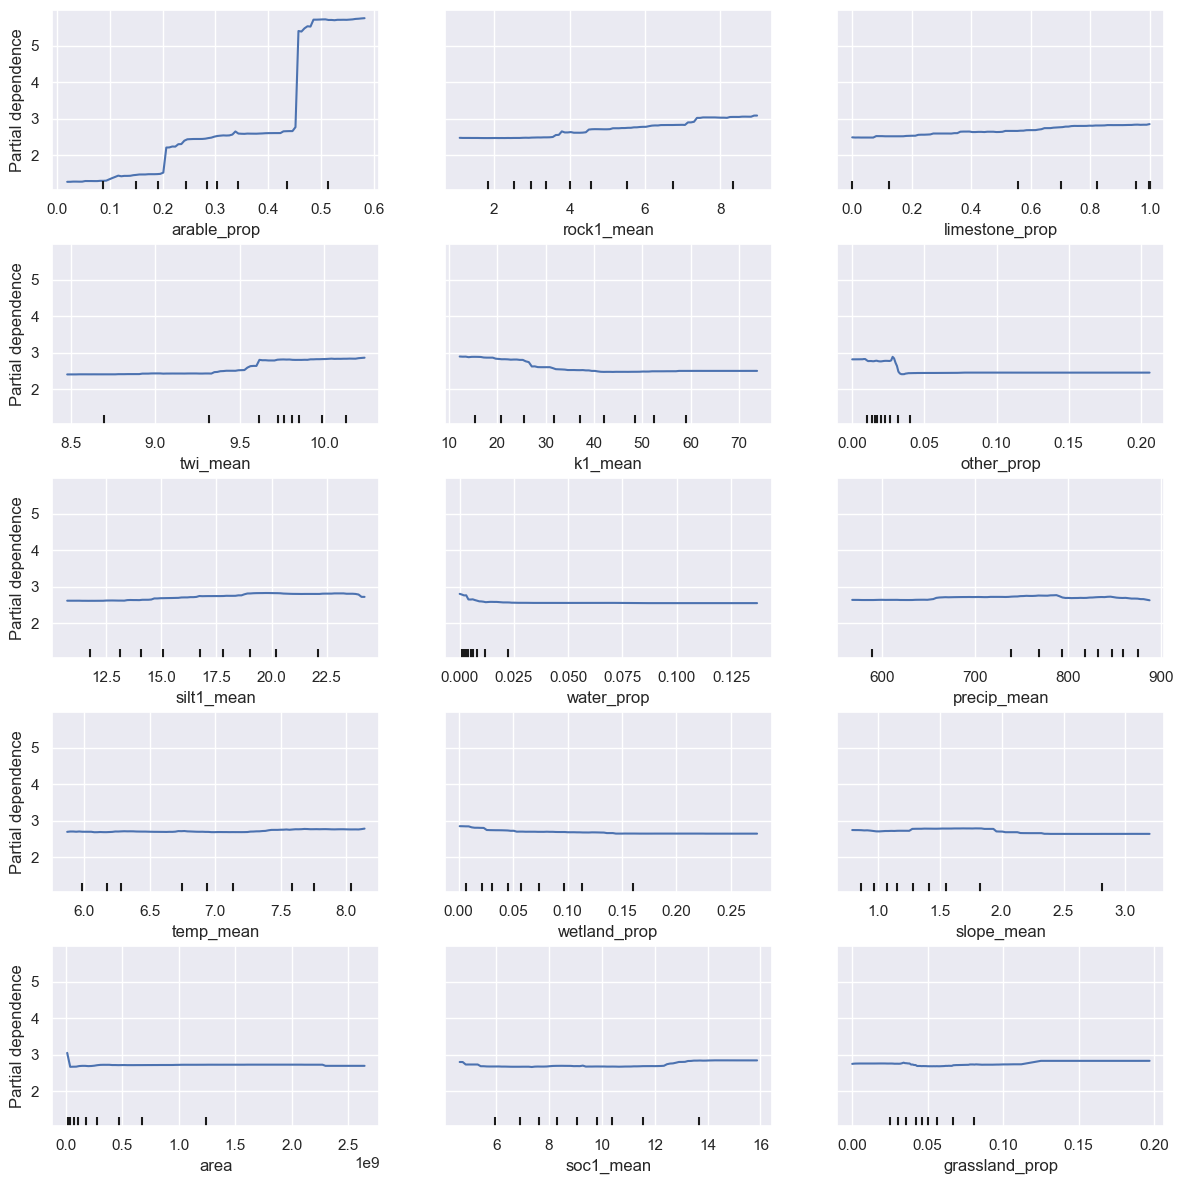

In [29]:
# Create partial dependence plot
fig, ax = plt.subplots(figsize=(12, 12))
disp = PartialDependenceDisplay.from_estimator(regressor_reduced, X_train_reduced, X_train_reduced.columns, ax=ax)
fig.subplots_adjust(hspace=0.3)
fig.tight_layout()